In [16]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import math


from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import confusion_matrix #to get access to confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay# to get a display
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
import seaborn as sns #these are prettier plots

In [17]:
from io import StringIO

col_names = ['date', 'season', 'neutral', 'playoff', 'team1', 'team2', 'elo1_pre', 'elo2_pre', 'elo_prob1', 'elo_prob2', 'elo1_post',
             'elo2_post', 'qbelo1_pre', 'qbelo2_pre', 'qb1', 'qb2', 'qb1_value_pre', 'qb2_value_pre', 'qb1_adj', 'qb2_adj', 
             'qbelo_prob1', 'qbelo_prob2', 'qb1_game_value', 'qb2_game_value', 'qb1_value_post', 'qb2_value_post', 'qbelo1_post',
             'qbelo2_post', 'score1', 'score2', 'quality', 'importance', 'total_rating']

# load dataset
data = pd.read_csv("nfl_elo.csv", header=None, names=col_names)
data = data.drop(0)

In [18]:
# Loop through rows and replace NaN values in 'playoff' with 'r', signifying "Regular Season"
for index, row in data.iterrows():
    if pd.isna(row['playoff']):
        data.at[index, 'playoff'] = 'r'        

# Dropping last 3 columns        
data = data.drop(['quality', 'importance', 'total_rating'], axis=1)

In [19]:
#change categorical values to numeric values

# Importing LabelEncoder from Sklearn 
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
l1 = le.fit_transform(data['team1'])

data.drop("team1", axis=1, inplace=True)
 
# Appending the array to our dataFrame 
# with column name 'Purchased'
data["team1"] = l1

#repeat for the rest of the categorical values
l2 = le.fit_transform(data['team2'])
data.drop("team2", axis=1, inplace=True)
data["team2"] = l2

l3 = le.fit_transform(data['qb1'])
data.drop("qb1", axis=1, inplace=True)
data["qb1"] = l3

l4 = le.fit_transform(data['qb2'])
data.drop("qb2", axis=1, inplace=True)
data["qb2"] = l4

#change categorical values to numeric values

# Importing LabelEncoder from Sklearn 
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
l1 = le.fit_transform(data['team1'])

data.drop("team1", axis=1, inplace=True)
 
# Appending the array to our dataFrame 
# with column name 'Purchased'
data["team1"] = l1

#repeat for the rest of the categorical values
l2 = le.fit_transform(data['team2'])
data.drop("team2", axis=1, inplace=True)
data["team2"] = l2

l3 = le.fit_transform(data['qb1'])
data.drop("qb1", axis=1, inplace=True)
data["qb1"] = l3

l4 = le.fit_transform(data['qb2'])
data.drop("qb2", axis=1, inplace=True)
data["qb2"] = l4

l5 = le.fit_transform(data['playoff'])  
data.drop("playoff", axis=1, inplace=True)
data["playoff"] = l5

In [20]:
# Function to add column for win/loss result. 0 means team1 lost, 1 means team1 won. -1 indicates a tie.
def compare_scores(score1, score2):
    if score1 < score2:
        return 0
    elif score1 > score2:
        return 1
    else:
        return -1  # Return a special value indicating that the scores are equal

data['outcome'] = data.apply(lambda row: compare_scores(float(row['score1']), float(row['score2'])), axis=1)

# Remove rows where the scores are equal
data = data[data['outcome'] != -1]

In [21]:
# Split dataset in features and target variable
feature_cols = ['qbelo1_pre', 'qbelo2_pre', 'qb1_adj', 'qb2_adj']
X = data[feature_cols] # Features
y = data.outcome # Target variable 

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 20% test


Classification Report
              precision    recall  f1-score   support

           0       0.62      0.50      0.55      1913
           1       0.68      0.78      0.73      2608

    accuracy                           0.66      4521
   macro avg       0.65      0.64      0.64      4521
weighted avg       0.66      0.66      0.65      4521

Logistic Regression Accuracy of Scikit Model: 65.98%
Confusion Matrix


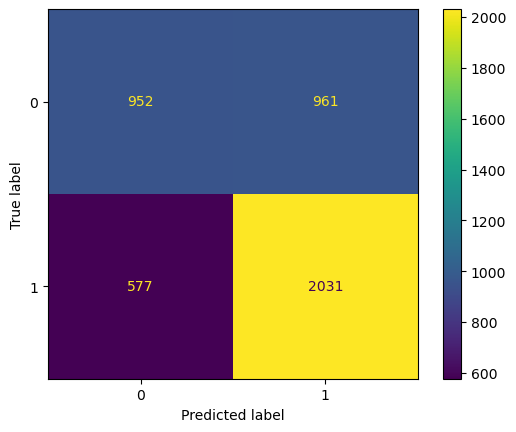

In [32]:
logistic_model = LogisticRegression(fit_intercept=True,C=1e15)
logistic_model.fit(X_train,y_train)
predicted = logistic_model.predict(X_test)


print("\nClassification Report")
report = classification_report(y_test,predicted)
print(report)

lr_accuracy = accuracy_score(y_test, predicted)
print('Logistic Regression Accuracy of Scikit Model: {:.2f}%'.format(lr_accuracy*100))

print("Confusion Matrix")
conf_mat = confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()


Classification Report
              precision    recall  f1-score   support

           0       0.62      0.50      0.55      1913
           1       0.68      0.78      0.73      2608

    accuracy                           0.66      4521
   macro avg       0.65      0.64      0.64      4521
weighted avg       0.66      0.66      0.65      4521

Logistic Regression Accuracy of Scikit Model: 65.98%
Confusion Matrix


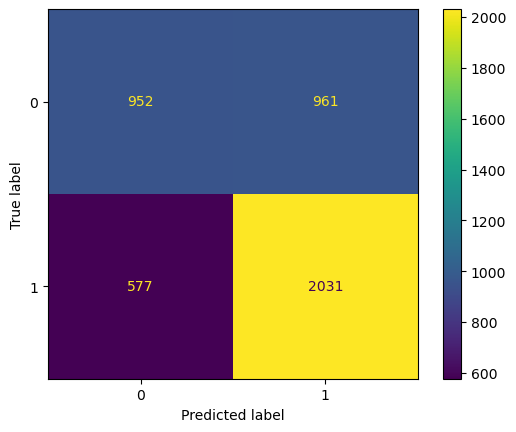

In [32]:
# Initialize the Logistic Regression model with Elastic Net penalty
model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000)

# Train the model
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print("\nClassification Report")
report = classification_report(y_test,predicted)
print(report)
lr_accuracy = accuracy_score(y_test, predicted)
print('Logistic Regression Accuracy of Scikit Model: {:.2f}%'.format(lr_accuracy*100))

print("Confusion Matrix")
conf_mat = confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

In [45]:
#try just two columns
two_columns = ['qbelo1_pre', 'qbelo2_pre']
X = data[two_columns] # Features
y = data.outcome # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
X_test = X_test.astype(float)

In [46]:
logistic_regression = make_pipeline(StandardScaler(), LogisticRegression())
logistic_regression.fit(X_train, y_train)
prediction = logistic_regression.predict(X_test)
accuracy = logistic_regression.score(X_test, y_test)
print(f"Accuracy on test set: {accuracy:.3f}")

Accuracy on test set: 0.664


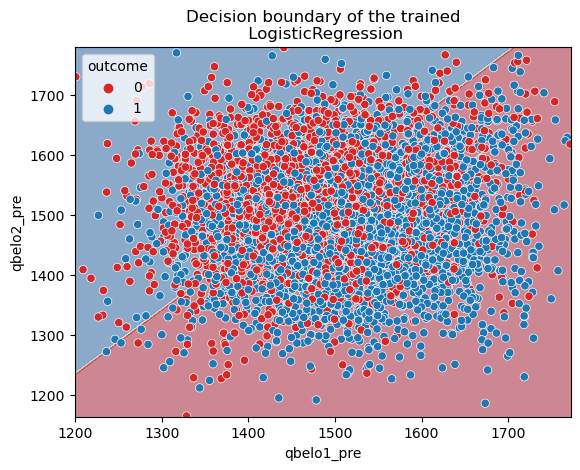

In [47]:
DecisionBoundaryDisplay.from_estimator(
    logistic_regression,
    X_test,
    response_method="predict",
    cmap="RdBu_r",
    alpha=0.5,
)
sns.scatterplot(
    data=X_test,
    x=two_columns[0],
    y=two_columns[1],
    hue=y_test,
    palette=["tab:red", "tab:blue"],
)
_ = plt.title("Decision boundary of the trained\n LogisticRegression")

In [39]:
#try just two columns
two_columns = ['qb1_adj', 'qb2_adj']
X = data[two_columns] # Features
y = data.outcome # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
X_test = X_test.astype(float)

In [43]:
logistic_regression = make_pipeline(StandardScaler(), LogisticRegression())
logistic_regression.fit(X_train, y_train)
prediction = logistic_regression.predict(X_test)
accuracy = logistic_regression.score(X_test, y_test)
print(f"Accuracy on test set: {accuracy:.3f}")

Accuracy on test set: 0.578


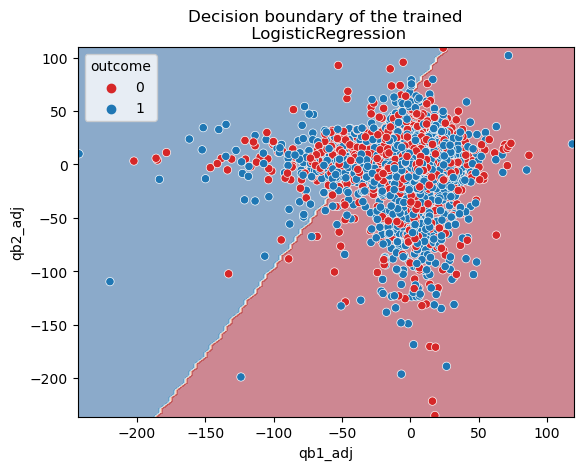

In [44]:
DecisionBoundaryDisplay.from_estimator(
    logistic_regression,
    X_test,
    response_method="predict",
    cmap="RdBu_r",
    alpha=0.5,
)
sns.scatterplot(
    data=X_test,
    x=two_columns[0],
    y=two_columns[1],
    hue=y_test,
    palette=["tab:red", "tab:blue"],
)
_ = plt.title("Decision boundary of the trained\n LogisticRegression")